# Lab 12: Runge-Kutta Method for Systems of Differential Equations/Implicit Trapezoidal with Newton Iteration

A building consists of two floors. The first floor is attached rigidly to the ground, and the second floor is of mass $m = 1000$ slugs (fps units). The elastic frame of the building behaves as a spring that resists horizontal displacements of the second floor; it requires a horizontal force of 5.5 tons (11,000 lb) to displace the second floor a distance of 1 ft. Assume that in an earthquake the ground oscillates horizontally with a force

$$
F(t) = 1949.55 \sin(2.7925t)
$$

lb on the second floor. (This force corresponds to the situation that the ground undergoes one oscillation every 2.25 sec with an amplitude of 3 in.)

### (a)
Use Hooke's Law $F = -kx$ to find the spring constant $k$ for the building structure.

### (b)
The (simplified) initial value problem which describes the horizontal motion of the second floor in this earthquake is

$$
m x'' + k x = F(t), \quad 0 \leq t, \quad x(0) = 0, \quad x'(0) = 0,
$$

where $m$ is the mass, $k$ is the spring constant, $F(t)$ is the external force, and $x$ is the displacement. Convert this problem into a system of two first-order equations.

### (c)
Use your Python function `RK4sys` to approximate the solution of the system you found in (b) for time from 0 to 30 seconds. Use step size $h = 0.25$ sec. What is the largest displacement of the second floor from its equilibrium position? (Use `max`)

### (d)
Use `plt.subplot` to graph the displacement (variable $x$) and the velocity (variable $x'$) of the second floor for $0 \leq t \leq 30$ in two sub-figures. Save your figure into a file named `lab12ex2d.png`.

### (e)
Try $k = 7800$ in the system, and solve for $0 \leq t \leq 30$. Graph the displacement $x$, and save the figure into a file named `lab12ex2e.png`. What can you say about the building in the earthquake?


a)

Hooke's Law: $F = -kx$
$F$ is force, $x$ is the length of the extension/compression
$$ -11,000 \ lbs = -k \cdot 1 ft$$
$$ k = 11,000 lb/ft $$

b)

$$mx'' + kx = F(t), 0 \le t$$
$$x(0) = 0, x'(0) = 0 $$
(1)
$$ \frac{dx}{dt} = x' \ \dots \ mx'' = F(t) - kx $$
$$ \frac{dx'}{dt} = x'' \ \dots \ x'' = \frac{F(t) - kx}{m} $$
$$ \ $$
(2)
$$ \frac{dx}{dt} = x'$$
$$ \frac{dx'}{dt} = \frac{F(t) - kx}{m} $$
$$ \ $$
Let

$$
\vec{u} = \begin{pmatrix} x \\ x' \end{pmatrix}
$$

Define matrix $ A $ such that

$$
\frac{d}{dt} \begin{pmatrix} x \\ x' \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -k & 0 \end{pmatrix} \begin{pmatrix} x \\ x' \end{pmatrix}
$$

or, equivalently,

$$
\frac{d \vec{u}}{dt} = A \vec{u}
$$



In [1]:
# c
import numpy as np
from NumericalMethodsCode.RK4sys import RK4sys

# Given parameters
m = 1000
k = 11000

# Define the system of first-order equations
f1 = lambda t, u: u[1]
f2 = lambda t, u: (1949.55 * np.sin(2.7925 * t) - k * u[0]) / m
F = np.array([f1, f2])

# Initial conditions
alpha = np.array([0, 0])  # [x(0), x'(0)]

# Define the time interval for solving the differential equations
a = 0
b = 30  # End time

# Step size
h = 0.25

# Number of steps
N = int((b - a) / h)

# Call the RK4sys function with the correct arguments
t, w = RK4sys(F, a, b, alpha, 2, N)

# finding largest displacement
max_displacement = np.max(np.abs(w[:, 0]))
print('The largest displacement of the second floor from its equilibrium position is:', max_displacement)


The largest displacement of the second floor from its equilibrium position is: 1.089822707027647


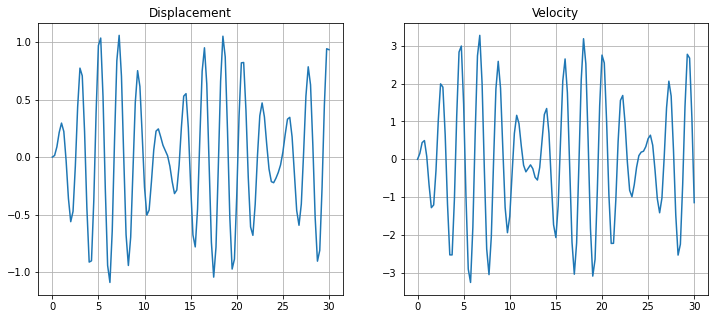

In [2]:

# d
import matplotlib.pyplot as plt
displacement = w[:, 0]
velocity = w[:, 1]

plt.figure(figsize=(12, 5))

# plotting
plt.subplot(1,2,1)
plt.plot(t, displacement)
plt.title('Displacement')
plt.grid()
plt.subplot(1,2,2)
plt.plot(t, velocity)
plt.title('Velocity')
plt.grid()
plt.show()

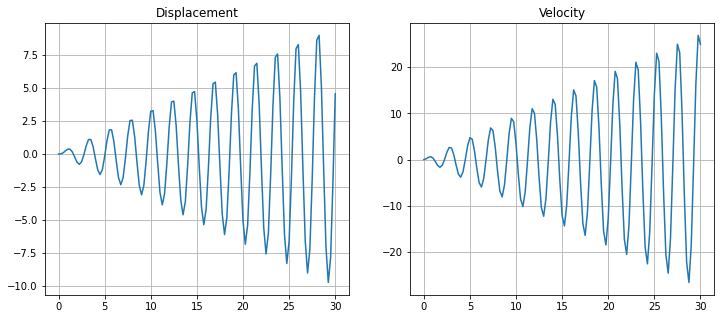

In [3]:
# e

k2 = 7800

# Define the system of first-order equations
f1 = lambda t, u: u[1]
f2 = lambda t, u: (1949.55 * np.sin(2.7925 * t) - k2 * u[0]) / m
F2 = np.array([f1, f2])

# Call the RK4sys function with the correct arguments
t2, w2 = RK4sys(F2, a, b, alpha, 2, N)

displacement2 = w2[:, 0]
velocity2 = w2[:, 1]

plt.figure(figsize=(12, 5))

# plotting
plt.subplot(1,2,1)
plt.plot(t2, displacement2)
plt.title('Displacement')
plt.grid()
plt.subplot(1,2,2)
plt.plot(t2, velocity2)
plt.title('Velocity')
plt.grid()
plt.show()

The displacement grows as time goes on. The building may collapse.

### Consider the initial value problem

$$
\frac{dy}{dt} = \frac{50}{y} - 50y, \quad y(0) = \sqrt{2}, \quad t \in [0, 1].
$$

The true solution is given by

$$
y(t) = \sqrt{1 + e^{-100t}}.
$$

### (a)
Use Euler's method with $h = 0.1$ to approximate the solution. Write down the absolute errors of the approximations.

### (b)
Use the fourth-order Runge-Kutta method with $h = 0.1$ to approximate the solution. Write down the absolute errors of the approximations.

### (c)
Use the fourth-order Adams Predictor-Corrector method with $h = 0.1$ to approximate the solution. Write down the absolute errors of the approximations.

### (d)
Use the Implicit Trapezoidal method with Newton's method (tol $= 10^{-6}$, maxN $= 20$) and with $h = 0.1$ to approximate the solution. Write down the absolute errors of the approximations.


In [4]:
# a
from NumericalMethodsCode.euler import euler
import math

# Define the function and initial conditions
f = lambda t, y: 50/y - 50*y
t_euler, w_euler = euler(f, 0, 1, math.sqrt(2), int((1 - 0) / 0.1))

# True solution and absolute error
yt = lambda t: math.sqrt(1 + math.exp(-100 * t))
y_true = [yt(t) for t in t_euler]
abserr_euler = [abs(y_t - w) for y_t, w in zip(y_true, w_euler)]

# Print t and absolute error without scientific notation
print("t and Euler Absolute Errors:")
for t, err in zip(t_euler, abserr_euler):
    print(f"{t:.1f} \t {err:.8f}")  # Adjust .6f as needed for desired precision


t and Euler Absolute Errors:
0.0 	 0.00000000
0.1 	 3.12134304
0.2 	 5.12825877
0.3 	 24.69714264
0.4 	 93.57757466
0.5 	 379.25743200
0.6 	 1512.01650947
0.7 	 6053.06273323
0.8 	 24207.25010676
0.9 	 96834.00022049
1.0 	 387331.00083031


In [5]:
# b
from NumericalMethodsCode.RungeKutta4 import RungeKutta4
t_rk4, w_rk4 = RungeKutta4(f, 0, 1, np.sqrt(2), int((1-0)/0.1))
abserr_rk4 = np.array(abs(y_true - w_rk4))

print(f'[t, RK4 abs err] = \n{np.stack((t_rk4, abserr_rk4),axis=1)}')

[t, RK4 abs err] = 
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e-01 1.68526193e+01]
 [2.00000000e-01 2.16745864e+02]
 [3.00000000e-01 2.95840127e+03]
 [4.00000000e-01 4.05420340e+04]
 [5.00000000e-01 5.55751008e+05]
 [6.00000000e-01 7.61840736e+06]
 [7.00000000e-01 1.04435655e+08]
 [8.00000000e-01 1.43163875e+09]
 [9.00000000e-01 1.96253813e+10]
 [1.00000000e+00 2.69031268e+11]]


In [6]:
# c
from NumericalMethodsCode.Adams4PredictCorrect import Adams4PredictCorrect
t_adams, w_adams = Adams4PredictCorrect(f, 0, 1, np.sqrt(2), int((1-0)/0.1))
abserr_adams = np.array(abs(y_true - w_adams))

print(f'[t, Adams4PredictCorrect abs err]\n{np.stack((t_adams, abserr_adams),axis=1)}')

[t, Adams4PredictCorrect abs err]
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e-01 1.68526193e+01]
 [2.00000000e-01 2.16745864e+02]
 [3.00000000e-01 2.95840127e+03]
 [4.00000000e-01 4.47247794e+04]
 [5.00000000e-01 6.82637969e+05]
 [6.00000000e-01 1.04238306e+07]
 [7.00000000e-01 1.59172738e+08]
 [8.00000000e-01 2.43058012e+09]
 [9.00000000e-01 3.71151469e+10]
 [1.00000000e+00 5.66751172e+11]]


In [22]:
# d
from NumericalMethodsCode.ImTrapezoidal import ImTrapezoidal

# Define the function and its derivative
f = lambda t, y: 50 / y - 50 * y
fder = lambda t, y: -50 / (y ** 2) - 50

# Set parameters
a, b = 0, 1
alpha = math.sqrt(2)
h = 0.1
N = int((b - a) / h)  # Calculate the number of steps
tol = 1e-6
maxN = 20

# True solution for error calculation
yt = lambda t: math.sqrt(1 + math.exp(-100 * t))

# Compute the solution using ImTrapezoidal
t_trap, w_trap = ImTrapezoidal(f, fder, a, b, alpha, N, tol, maxN)

# Calculate true solution values and absolute errors
y_true = [yt(t) for t in t_trap]
abserr_trap = [abs(y_true_i - w_trap_i) for y_true_i, w_trap_i in zip(y_true, w_trap)]

# Display the results
# print("t and Absolute Errors:")
# for t, err in zip(t_trap, abserr_trap):
#     print(f"{t:.1f} \t {err:.6f}")

# *********************************************
# need to fix...
# *********************************************